# Fraud Detection on Bank Payments

# Project Design

The below outline will be used for this project.

1. Introduction
2. Problem Statement
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Model Evaluation
6. Findings/Conclusion

## Introduction

In 2016, Nilson reported that global card fraud losses increased to approximately USD 22.8 billion. In the subsequent four year period, Juniper Research predicts losses up to USD 71 billion due to card-not-present (CNP) fraud with North America, the Far East and China comprising for 80 percent of these cases.

The U.S. dollar value of the transaction also has an impact on the likelihood of fraud occurring fraud. In 2017, transactions valued at greater than USD 500 had a fraud rate 22 times higher than those valued at less than USD 100. Moreover, once a fraudulent transaction has happened, it takes an average of 53 days to detect fraudulent activity in Account Take Over (ATO) cases, while it takes an average of 30 days to detect other types of fraud. Therefore, this type of fraud causes
major inconvenience for the customer who spends an average of USD 290 and 30 hours to resolve their fraud causes. The motivation for choosing this project is that I am a victim of credit card fraud.

## Problem Statement

Classification of fraudulent transactions using a synthetic dataset generated using the simulator called PaySim. PaySim uses aggregated data from the private dataset to generate a synthetic
dataset that resembles the normal operation of transactions and injects malicious behavior to later evaluate the performance of fraud detection methods. The problem is to create an algorithm
which accurately predicts whether a transaction is fraudulent. The model that will be used is a classification as we want to determine whether a transaction is fraudulent.

# Exploratory Data Analysis (EDA)

In [5]:
import os
import math
from numpy import * 
import numpy as np
import pandas as pd
import random
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization

In [10]:
#Load data 
data = pd.read_csv(r"C:/Users/Uday Joshi/OneDrive/Documents/Udacity/Machine Learning Nanodegree/Capstone Project/Data/Bank_Sim_Data.csv")
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
#check the shape of the dataset
data.shape

(6362620, 11)

In [12]:
#examine the dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
# check missing values
data.isnull().values.any()

False

In [14]:
#check for duplicate values
data.duplicated(keep='first').any()

False

C:\Users\Uday Joshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Transactions over the Time')

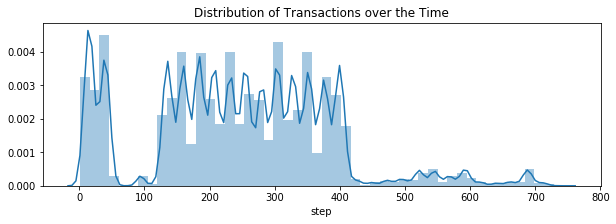

In [15]:
#Distribution of the frequency of all transactions
plt.figure(figsize=(10, 3))
sns.distplot(data.step)
plt.title('Distribution of Transactions over the Time')

In [16]:
# Filter data by the labels. Valid and Fraud transaction
valid = data[data['isFraud']==0]
fraud = data[data['isFraud']==1]

C:\Users\Uday Joshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


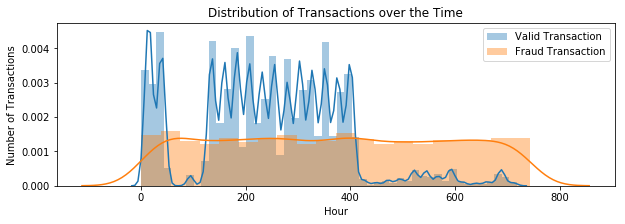

In [17]:
#See the frequency of the transactions for each class on the same plot.
plt.figure(figsize=(10, 3))
sns.distplot(valid.step, label="Valid Transaction")
sns.distplot(fraud.step, label='Fraud Transaction')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions over the Time')
plt.legend()

There is a decrease in valid transactions in 3rd and 4th day and after 16th day of the month, fraudulent transactions occur at an even pace. This is seen sspecially in the second half of the month, where there are a lower number of valid transactions but number of fraudulent transactions does not decrease during this time period.

## Hourly Transaction Amounts

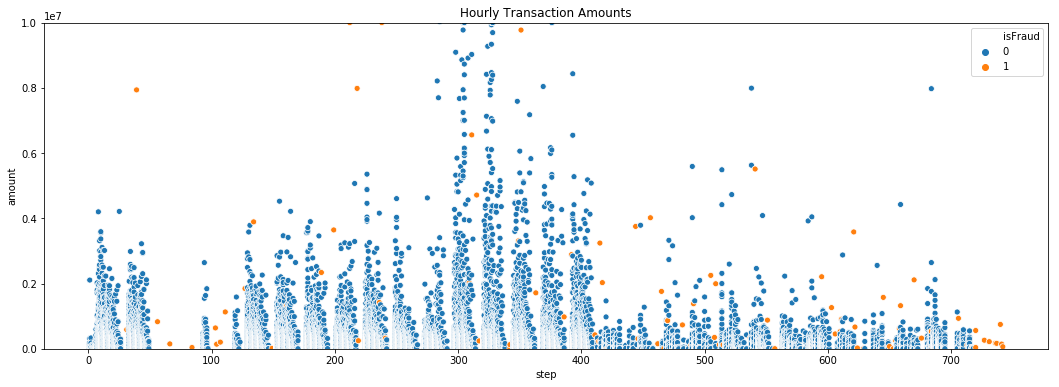

In [18]:
#using a sample of data to scatterplot the transaction happens every hour and their amount. 
smalldata=data.sample(n=100000, random_state=1)
smalldata=smalldata.sort_index()
smalldata=smalldata.reset_index(drop=True)

#plot the small data
plt.figure(figsize=(18,6))
plt.ylim(0, 10000000)
plt.title('Hourly Transaction Amounts')
ax = sns.scatterplot(x="step", y="amount", hue="isFraud",
                     data=smalldata)

The above plot demonstrate that a degree of seasonality in the number of transaction during the day. We observe a pattern every 24 hours. It is not known what time of the day '0' represents here but we observe highest transactions clusters around the middle of 24 hour period. It could suggest the time to be aroundnoon or mid day. Next, we will determine whether fraud transactions follows a similar kind of pattern.

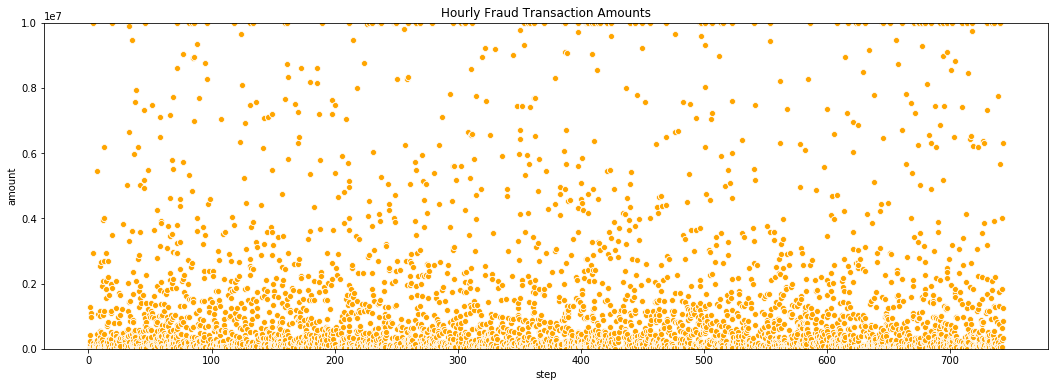

In [19]:
#The hourly amount of al fraud transactions
plt.figure(figsize=(18,6))
plt.ylim(0, 10000000)
plt.title('Hourly Fraud Transaction Amounts')
ax = sns.scatterplot(x="step", y="amount", color='orange',
                     data=fraud)

Fraudulent transactions do not demonstrate a significant pattern unlike valid transactions in terms of the number of accurance. These transactions occur nearly every hour in the same frequency. It can be determine that there are more fraudulent transactions in lower amounts than higher amonts throughout the time period.

## Transaction Amount Distributions

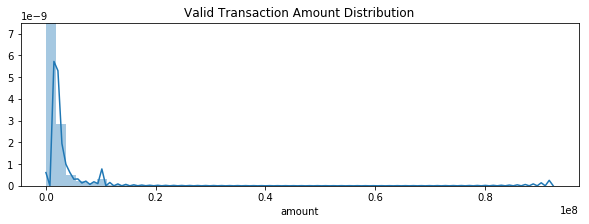

In [69]:
#valid transactions amount distribution plot
plt.figure(figsize=(10,3))
plt.ylim(0, 0.0000000075)
plt.title('Valid Transaction Amount Distribution')
sns.distplot(valid.amount)

In [21]:
valid.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

Valid transactions occur at a greater frequency in low amounts. There is a maximum of USD 1M, but above that amount the frequency decreases.

C:\Users\Uday Joshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


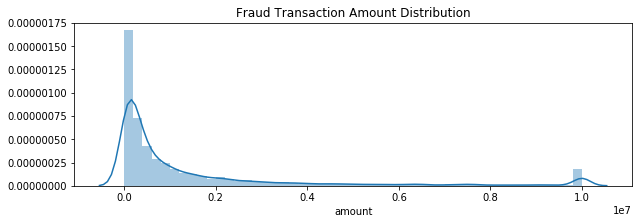

In [22]:
# Fraud transactions amount distribution plot
plt.figure(figsize=(10,3))
plt.title('Fraud Transaction Amount Distribution')
sns.distplot(fraud.amount)

From the above plot, there is a peak at USD 1M. We will investigate the frequency of fraudulent transactions at USD 1M.

In [23]:
# fraud transactions amount value counts
fraud.amount.value_counts()

10000000.00    287
0.00            16
429257.45        4
1165187.89       4
76646.05         2
25529.76         2
2689633.80       2
296699.39        2
1041647.06       2
447474.67        2
445257.43        2
1437291.89       2
3297243.38       2
2198224.71       2
1892137.66       2
266546.68        2
39342.59         2
141410.98        2
230652.43        2
91637.51         2
283400.42        2
585396.14        2
22824.08         2
972009.75        2
556218.01        2
52541.42         2
2131624.18       2
934590.45        2
3011102.29       2
74804.24         2
              ... 
399045.08        1
123194.95        1
229909.57        1
42062.82         1
994453.20        1
454859.39        1
536624.41        1
234377.29        1
407005.78        1
149668.66        1
416001.33        1
181728.11        1
577418.98        1
94372.61         1
2542664.27       1
4953893.08       1
332729.54        1
89571.46         1
40611.22         1
3171085.59       1
291519.84        1
202978.65   

There are 287 fraudulent transactions that each amount to USD 1M.

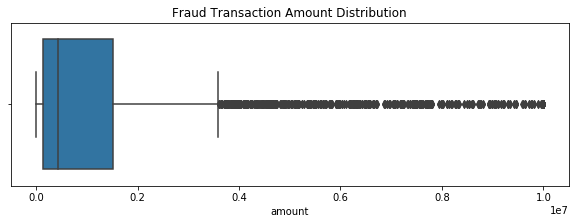

In [24]:
#Fraud transaction boxplot for amount distribution
plt.figure(figsize=(10,3))
plt.title('Fraud Transaction Amount Distribution')
ax = sns.boxplot(x=fraud["amount"])

In [25]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

The majority of fraudulent transactions are for less than USD 400,000.

In [26]:
#average amount for frauds below 400K
fraud[fraud.amount<400000].amount.mean()

144912.16828933996

Fraudulent transactions have a large range of USD 119 to USD 10M. The Frequency distribution of the amount of money involved in fraudulent transactions is positively skewed, therefore the majority of fraudulents transactions are for a lower amount (Majority of fraud transactions are lower than USD 1M). But in USD 1M there is an interesting increase similar to valid transactions. There are also some fraudulent labeled transactions that have USD 0 amount. I want to investigate further into those instances, which there are 16 of them.

In [27]:
#checking "0" in the fraud  amount
fraud[fraud.amount==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


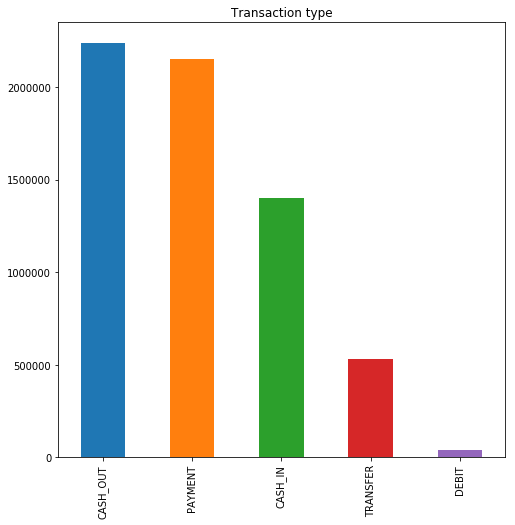

In [64]:
# Count of the different types of transactions
print(data.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

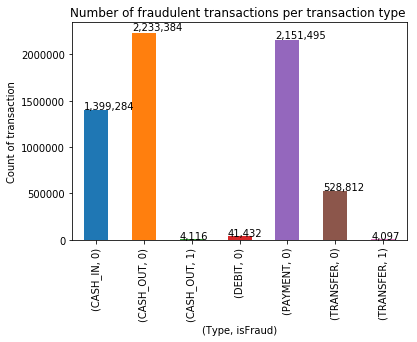

In [68]:
# Number of transactions that are fraud per transaction type 
ax = data.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("Number of fraudulent transactions per transaction type ")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

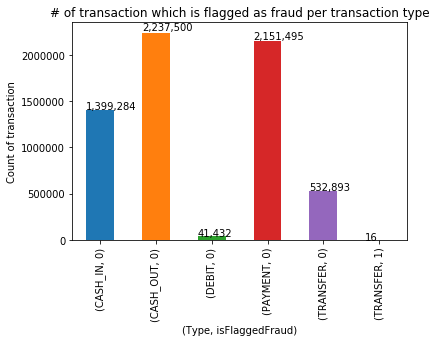

In [66]:
# Number of flagged fraudelent transactions per transaction type
ax = data.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

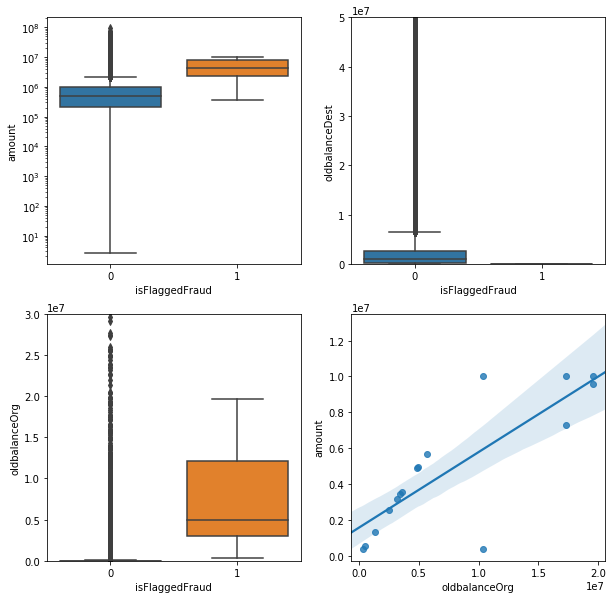

In [67]:
# as per the above plot, transfer has 16 transactions. Filter to see only those 16 transactions.
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = data.loc[(data.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()

## Type of Transactions

In [28]:
#checking type of valid transactions
valid.type.value_counts()

CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64

In [29]:
#checking type of fraudulent transactions
fraud.type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

It can also be noted that fraudulent transactions occur when the transaction type is **CASH_OUT** or **TRANSFER**.

## Rate of Fraud Transactions

In [30]:
#proportion of number of frauds 
data.isFraud.value_counts()[1]/(data.isFraud.value_counts()[0]+data.isFraud.value_counts()[1])

0.001290820448180152

Fraudulent transactions consist of 0.01% of valid transactions. Target class is pretty skewed.

In [32]:
#proportion of fraud amount
fraud.amount.sum()/(valid.amount.sum()+fraud.amount.sum())

0.010535206008606473

0.01% of money stolen from the valid transactions.

## isFlaggedFraud column

In [33]:
#value counts of isFlaggedFraud column
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [34]:
#determining the 16 positive values 
data[data.isFlaggedFraud==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


## Data Preprocessing

### Feature Engineering

Subsetting data to filter for TRANSFER or CASH_OUT transactions

In [35]:
#filtering only transfer and cash_out data
data_by_type=data[data['type'].isin(['TRANSFER','CASH_OUT'])]

### Get 100,000 random samples from the filtered data

Taking a subsample of the data as the entire dataset is too big to work with a machine learning algorithm.

In [36]:
#subsample data , get 100,000 instances to train model
df=data_by_type.sample(n=100000, random_state=1)
df=df.sort_index()
df=df.reset_index(drop=True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_OUT,136872.92,C1533123860,162075.98,25203.05,C766572210,217806.00,0.00,0,0
1,1,TRANSFER,367768.40,C288306765,0.00,0.00,C1359044626,370763.10,16518.36,0,0
2,1,CASH_OUT,81029.86,C324112183,0.00,0.00,C288665596,105343.00,8496.61,0,0
3,1,CASH_OUT,53631.83,C1233595751,0.00,0.00,C757108857,83244.00,0.00,0,0
4,1,CASH_OUT,365510.05,C1299327689,0.00,0.00,C564160838,564572.76,1254956.07,0,0


### Binary encoding the type column

In [37]:
#drop the name columns
df=df.drop(['nameOrig', 'nameDest'], axis=1)
#Binary-encoding of labelled data in 'type'
df.loc[df.type == 'CASH_OUT', 'type'] = 1
df.loc[df.type == 'TRANSFER', 'type'] = 0
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,136872.92,162075.98,25203.05,217806.00,0.00,0,0
1,1,0,367768.40,0.00,0.00,370763.10,16518.36,0,0
2,1,1,81029.86,0.00,0.00,105343.00,8496.61,0,0
3,1,1,53631.83,0.00,0.00,83244.00,0.00,0,0
4,1,1,365510.05,0.00,0.00,564572.76,1254956.07,0,0


## Model Evaluation

In [39]:
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn.linear_model import LogisticRegression # import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score # import accuracy metrics
from sklearn.ensemble import RandomForestClassifier #import RandomForestClassifier
from sklearn import svm  #import support vector machine classifier
import xgboost as xgb  
from xgboost import  XGBClassifier  #import xgboost classifier 
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # import GridSearchCV
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [40]:
#Slice the target and features from the dataset
features=df.drop('isFraud', axis=1)
target =df.isFraud

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

### Baseline Models

In this section, I will run five classification models with their default parameter to determine performance. The performance metric that will be used is the Area Under the Precision-Recall Curve (AUPRC) as the dataset is unbalanced.

In [41]:
# General function to run classifier with default parameters to get baseline model
def ml_func (algoritm):
    #train and fit regression model
    model=algoritm()
    model.fit(X_train, y_train)

    # predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # evaluate
    train_accuracy = roc_auc_score(y_train, train_preds)
    test_accuracy = roc_auc_score(y_test, test_preds)
    #report = classification_report(y_test, test_preds)

    print(str(algoritm))
    print("------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100):.4}%")
    print(f"Test Accuracy:     {(test_accuracy * 100):.4}%")

    # store accuracy in a new dataframe
    score_logreg = [algoritm, train_accuracy, test_accuracy]
    models = pd.DataFrame([score_logreg])

In [42]:
#list of all classifiers that I will run for base models 
algoritms=[LogisticRegression,KNeighborsClassifier,RandomForestClassifier,XGBClassifier,svm.SVC]

#running each model and print accuracy scores
for algoritm in algoritms:
    ml_func (algoritm)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
------------------------
Training Accuracy: 76.58%
Test Accuracy:     76.39%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
------------------------
Training Accuracy: 85.01%
Test Accuracy:     78.41%
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
------------------------
Training Accuracy: 99.78%
Test Accuracy:     79.41%
<class 'xgboost.sklearn.XGBClassifier'>
------------------------
Training Accuracy: 100.0%
Test Accuracy:     82.35%
<class 'sklearn.svm._classes.SVC'>
------------------------
Training Accuracy: 63.44%
Test Accuracy:     61.76%


### Grid Search for Best Hyper-Parameter

Next grid search will be used to optimize the Random Forest and XGBoost models. Grid search will allow for the discovery of the best parameters to pass to the model to get the most accurate result. I will create a function for grid search named best_param. It will take parameter values and the classifer and print our the best parameter combinations.

In [43]:
#general function for grid search
def grid_src(classifier, param_grid):
    param_grid=param_grid
    # instantiate the tuned random forest
    grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1)

    # train the tuned random forest
    grid_search.fit(X_train, y_train)

    # print best estimator parameters found during the grid search
    print((str(classifier) + 'Best Parameters'))
    print("------------------------")
    print(grid_search.best_params_)
    return grid_search.best_params_

In [44]:
#Grid Search for best parameters of RandomForestClassifier
param_grid_rf = {'n_estimators': [10, 80, 100],
                  'criterion': ['gini', 'entropy'],         
                  'max_depth': [10], 
                  'min_samples_split': [2, 3, 4]
                 }

rf_params=grid_src(RandomForestClassifier(),param_grid_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)Best Parameters
------------------------
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}


In [45]:
#Grid Search for best parameters of XGBClassifier
param_grid_xg = {'n_estimators': [100],
              'learning_rate': [0.05, 0.1], 
              'max_depth': [3, 5, 10],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1, 0.2]
                }
grid_src(XGBClassifier(), param_grid_xg)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)Best Parameters
------------------------
{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 100}

### Run models with their best parameters

In [46]:
#a function to train and evaluate a  model with given datasets 
#it also prints the accuracy scores 
def run_model(model, X_train, y_train,X_test, y_test ):
    model.fit(X_train, y_train)

    # predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # evaluate
    train_accuracy = roc_auc_score(y_train, train_preds)
    test_accuracy = roc_auc_score(y_test, test_preds)
    report = classification_report(y_test, test_preds)

    #print reports of the model accuracy
    print('Model Scores')
    print("------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100):.4}%")
    print(f"Test Accuracy:     {(test_accuracy * 100):.4}%")
    print("------------------------------------------------------")
    print('Classification Report : \n', report)

In [47]:
# Running RandomForestClassifier with best parameters
rf_model=RandomForestClassifier(n_estimators=100, 
                                  criterion= 'gini', 
                                  max_depth= 10, 
                                  min_samples_split= 3)
                               
                               
run_model(rf_model, X_train, y_train,X_test, y_test)

Model Scores
------------------------
Training Accuracy: 86.78%
Test Accuracy:     78.43%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19949
           1       0.97      0.57      0.72        51

    accuracy                           1.00     20000
   macro avg       0.98      0.78      0.86     20000
weighted avg       1.00      1.00      1.00     20000



In [48]:
# Running XGBClassifier with best parameters
xgb_model=XGBClassifier(colsample_bytree= 1, 
                        n_estimators= 100,
                        gamma= 0.1,
                        learning_rate=0.1,
                        max_depth=5
                        )
                                                                 
run_model(xgb_model, X_train, y_train,X_test, y_test)

Model Scores
------------------------
Training Accuracy: 91.63%
Test Accuracy:     82.35%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19949
           1       1.00      0.65      0.79        51

    accuracy                           1.00     20000
   macro avg       1.00      0.82      0.89     20000
weighted avg       1.00      1.00      1.00     20000



The XGBoost model performed better with the best parameters set.

Random forest classifier might be effected the skewness of the target. As dataset is unbalanced, SMOTE will be used.

### Dealing with Unbalanced Data

### Balancing Data via Oversampling with SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

# view previous class distribution
print(target.value_counts()) 

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# view synthetic sample class distribution
print(pd.Series(y_resampled).value_counts())

0    99722
1      278
Name: isFraud, dtype: int64
1    79773
0    79773
Name: isFraud, dtype: int64


In [50]:
# perform  train-test-split over resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

### Running models with the balanced data with best parameters

In [51]:
#Running Random Forest Model with resampled data
run_model(rf_model, X_train, y_train,X_test, y_test)

Model Scores
------------------------
Training Accuracy: 99.44%
Test Accuracy:     99.35%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     19746
           1       0.99      1.00      0.99     20141

    accuracy                           0.99     39887
   macro avg       0.99      0.99      0.99     39887
weighted avg       0.99      0.99      0.99     39887



In [52]:
#Running XGBoost Model with resampled data
run_model(xgb_model, X_train, y_train,X_test, y_test)

Model Scores
------------------------
Training Accuracy: 99.64%
Test Accuracy:     99.54%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     19746
           1       0.99      1.00      1.00     20141

    accuracy                           1.00     39887
   macro avg       1.00      1.00      1.00     39887
weighted avg       1.00      1.00      1.00     39887



The performance increased dramatically for both models, although having almost 100% accuracy is suspicious, which could be caused by the synthetic data that SMOTE created. As there are only a small amount of instances for the fraudulent class, it created too many of the same data, and the model memorized that pattern and gives perfect result on the test set. As a result, there is highly possible that same data points are also available in the test set.

### Subsampling Data from the Original Dataset

There was a vast dataset to begin this project and I conducted random sampling to in order to reduce the computational load. But I have a lot more natural fraud data point in this dataset that I can use. Therefore, instead of creating synthetic data I will choose those points and randomly choose the valid transaction data points to get a less skewed sample for my models.

In [54]:
#Filter the only types that fraud transaction occurs
data2=data[data['type'].isin(['TRANSFER','CASH_OUT'])]
#Slice data in to fraud and safe by isFraud values
valid_2 = data2[data2['isFraud']==0]
fraud_2 = data2[data2['isFraud']==1]
#get 50000 random sample from the safe transactions 
valid_sample=valid_2.sample(n=50000, random_state=1)
valid_sample=valid_sample.sort_index()
valid_samplef=valid_sample.reset_index(drop=True)
#combine all fraud observation and 50000 valid transaction data in to df3
df3=pd.concat([valid_sample,fraud_2])
df3.reset_index(drop=True)
#drop name columns
df3=df3.drop(['nameOrig', 'nameDest'], axis=1)
#Binary-encoding of labelled data in 'type'
df3.loc[df3.type == 'CASH_OUT', 'type'] = 1
df3.loc[df3.type == 'TRANSFER', 'type'] = 0
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
78,1,0,42712.39,10363.39,0.0,57901.66,24044.18,0,0
93,1,0,583848.46,0.00,0.0,667778.00,2107778.11,0,0
159,1,1,154716.20,0.00,0.0,187433.00,3461666.05,0,0
162,1,1,267148.82,0.00,0.0,641975.35,1178808.14,0,0
191,1,1,55105.90,0.00,0.0,317952.89,2719172.89,0,0


In [55]:
#check class labels
df3.isFraud.value_counts()

0    50000
1     8213
Name: isFraud, dtype: int64

### Running models with subsampled natural data

In [56]:
#Slide the target and features from the dataset
features2=df3.drop('isFraud', axis=1)
target2 =df3.isFraud
# split the data into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2)

In [57]:
# Running RandomForestClassifier with best parameters
run_model(rf_model, X_train2, y_train2,X_test2, y_test2)

Model Scores
------------------------
Training Accuracy: 93.5%
Test Accuracy:     93.55%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10056
           1       0.99      0.87      0.93      1587

    accuracy                           0.98     11643
   macro avg       0.98      0.94      0.96     11643
weighted avg       0.98      0.98      0.98     11643



In [58]:
# Running XGBClassifier with best parameters

run_model(xgb_model, X_train2, y_train2,X_test2, y_test2)

Model Scores
------------------------
Training Accuracy: 99.5%
Test Accuracy:     99.22%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10056
           1       0.97      0.99      0.98      1587

    accuracy                           0.99     11643
   macro avg       0.98      0.99      0.99     11643
weighted avg       0.99      0.99      0.99     11643



The above results look much more realistic. Next, I will use SMOTE on this new dataset and see how the results are altered. But XGBoost model seems to be working much better than in any set of data previously. Even though we have better proportion we still have unbalanced data. We can perform oversampling on this new data to have more fraud data.

### Performing SMOTE on the New Data

In [59]:
from imblearn.over_sampling import SMOTE

# view previous class distribution
print(target2.value_counts()) 

# resample data ONLY using training data
X_resampled2, y_resampled2 = SMOTE().fit_sample(X_train2, y_train2) 

# view synthetic sample class distribution
print(pd.Series(y_resampled2).value_counts()) 
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2)

0    50000
1     8213
Name: isFraud, dtype: int64
1    39944
0    39944
Name: isFraud, dtype: int64


### Running models with subsampled and oversampled data

In [60]:
# Running RandomForestClassifier with best parameters
run_model(rf_model, X_train2, y_train2,X_test2, y_test2)

Model Scores
------------------------
Training Accuracy: 93.81%
Test Accuracy:     92.63%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10045
           1       0.99      0.85      0.92      1598

    accuracy                           0.98     11643
   macro avg       0.98      0.93      0.95     11643
weighted avg       0.98      0.98      0.98     11643



In [61]:
# Running XGBClassifier with best parameters
run_model(xgb_model, X_train2, y_train2,X_test2, y_test2)

Model Scores
------------------------
Training Accuracy: 99.56%
Test Accuracy:     98.51%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10045
           1       0.98      0.97      0.98      1598

    accuracy                           0.99     11643
   macro avg       0.99      0.99      0.99     11643
weighted avg       0.99      0.99      0.99     11643



The XGBoost model moderately improved, but the Random Forest model's accuracy decreased when using the new data. It can be determined that the Random Forest model does not handle the repeated data in order to balance the dataset as well as the XGBoost model.

## Feature Importance

Determining the most influential features in the Random Forest and XGBoost models.

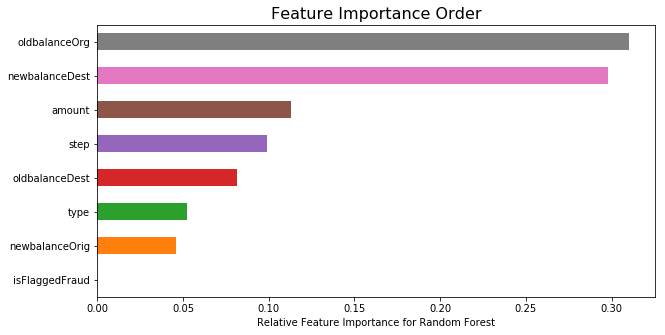

In [62]:
# plot the important features - based on Random Forest
feat_importances = pd.Series(rf_model.feature_importances_, index=features.columns)
ax.set_ylabel('features', size = 16);
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))
plt.xlabel('Relative Feature Importance for Random Forest');
plt.title('Feature Importance Order', size = 16);

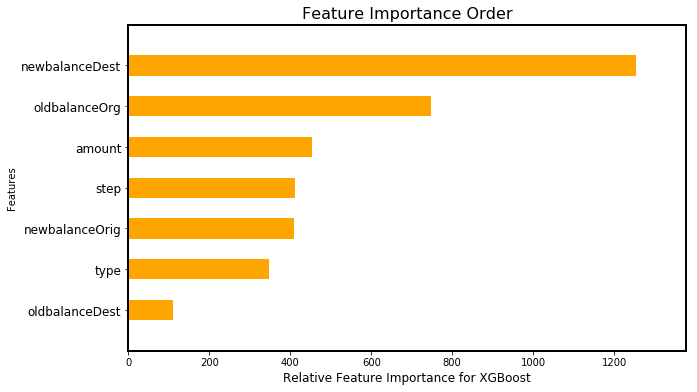

In [63]:
# plot the important features - based on XGBOOST
from xgboost import plot_importance

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
colours = plt.cm.Set1(np.linspace(0, 1, 9))
ax = plot_importance(xgb_model, height = 0.5, color = 'orange', grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)        
ax.set_xlabel('Relative Feature Importance for XGBoost', size=12);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Feature Importance Order', size = 16);